In [1]:
#importing libraries
import pandas as pd
import numpy as np 
%matplotlib inline
import seaborn as sns 
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import scipy.stats as ss

In [4]:
#importing the data
df=pd.read_csv(r'C:\\Users\\strog\\Documents\\Google Dr Backup\\Google Dr Glasgow DA Master\\Final Project\\code_and_data\\subset_2class_agg.csv', 
                      sep=',')

In [5]:
df.head()

,Num_Acc,shock_point,severity,gender,journey_reason,secu_equipment,acc_hour,lighting,built_up_area,junction_type,atmospheric_cond,road_type,traffic_type,road_slope,road_shape,surface_state,acc_place_on_road,driver_age,speed,severity2
0,200500000001,front,light injury,male,home - work/school,belt - used,19,altered lighting conditions,built-up area,out of junction,normal,departmental road,bidirectional traffic,flat,straight-lined part,normal,on the lane,29,50.0,injury
1,200500000001,side,hospitalised,female,leisury drive,belt - used,19,altered lighting conditions,built-up area,out of junction,normal,departmental road,bidirectional traffic,flat,straight-lined part,normal,on the lane,37,50.0,injury
2,200500000009,front,light injury,male,home - work/school,belt - used,17,good lighting conditions,out of built-up area,X junction,cloudy weather,departmental road,bidirectional traffic,flat,straight-lined part,normal,on the lane,39,80.0,injury
3,200500000009,side,hospitalised,male,leisury drive,belt - used,17,good lighting conditions,out of built-up area,X junction,cloudy weather,departmental road,bidirectional traffic,flat,straight-lined part,normal,on the lane,80,80.0,injury
4,200500000011,front,no injury,male,leisury drive,belt - used,2,altered lighting conditions,out of built-up area,out of junction,normal,national road,bidirectional traffic,flat,straight-lined part,normal,on the lane,33,80.0,no injury


In [48]:
#showing main info about dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254887 entries, 0 to 254886
Data columns (total 19 columns):
Num_Acc              254887 non-null int64
shock_point          254887 non-null object
severity             254887 non-null object
gender               254887 non-null object
journey_reason       254887 non-null object
secu_equipment       254887 non-null object
acc_hour             254887 non-null int64
lighting             254887 non-null object
built_up_area        254887 non-null object
junction_type        254887 non-null object
atmospheric_cond     254887 non-null object
road_type            254887 non-null object
traffic_type         254887 non-null object
road_slope           254887 non-null object
road_shape           254887 non-null object
surface_state        254887 non-null object
acc_place_on_road    254887 non-null object
driver_age           254887 non-null int64
speed                254887 non-null int64
dtypes: int64(4), object(15)
memory usage: 36.9+ MB
None


In [47]:
df=df.drop(labels=['severity2'], axis=1)

In [7]:
#changing type to integer for speed variable
df.speed=df.speed.astype('int64')

In [8]:
#showing mean, standard deviation and percentiles
df.describe()

,Num_Acc,acc_hour,driver_age,speed
count,2.548870e+05,254887.000000,254887.000000,254887.000000
mean,2.010424e+11,14.055425,40.452553,66.952038
std,3.852347e+08,5.033674,16.636992,23.879765
min,2.005000e+11,1.000000,14.000000,50.000000
25%,2.007000e+11,10.000000,26.000000,50.000000
50%,2.010000e+11,15.000000,37.000000,50.000000
75%,2.014000e+11,18.000000,51.000000,80.000000
max,2.017001e+11,23.000000,95.000000,130.000000


# Variables distribution

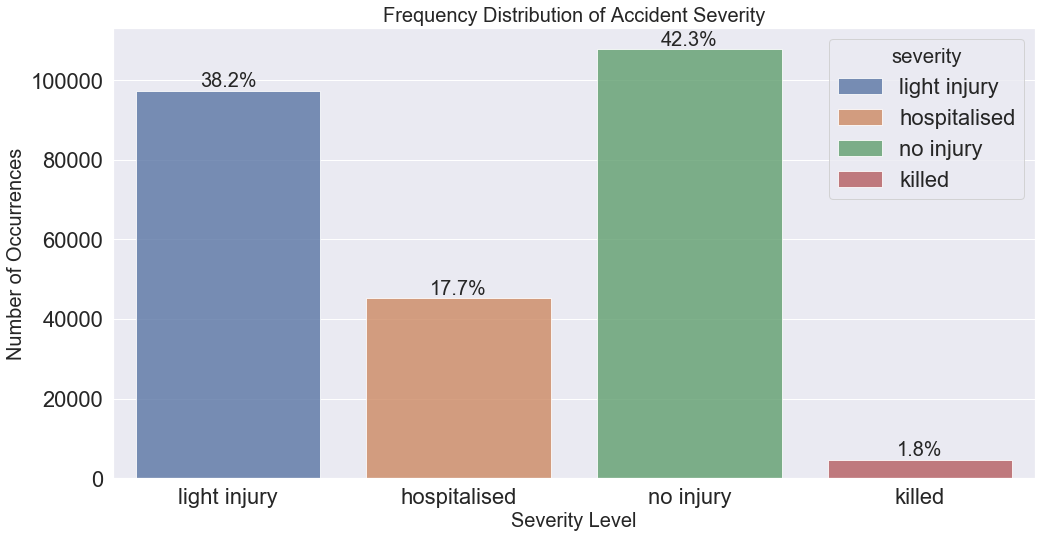

In [9]:
#plotting target variable distribution
sev_count = df['severity'].value_counts() 
sns.set(style="darkgrid", font_scale=1.5) 
total = float(len(df))
plt.figure(figsize=(15,8))
sns.set(font_scale=2)
splot=sns.countplot(x='severity', hue='severity', data=df, alpha=0.8, dodge=False) 

for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    splot.annotate(percentage, (x, y),ha='center', va='bottom', fontsize=20)
plt.title('Frequency Distribution of Accident Severity', fontsize=20) 
plt.ylabel('Number of Occurrences', fontsize=20) 
plt.xlabel('Severity Level', fontsize=20) 
plt.tight_layout()
plt.show()

As we can see, the distribution of the response variable is highly imbalanced with two major classes: “no injury” (42.3%) and “light injury” (38.2%) and two underrepresented classes: “hospitalised” (17.7%) and “killed” (1.8%). This imbalance will need to be taken into consideration while building and assessing the models.

## Correlation between numerical features

,acc_hour,driver_age,speed
acc_hour,1.000000,-0.016867,-0.026403
driver_age,-0.016867,1.000000,0.036472
speed,-0.026403,0.036472,1.000000


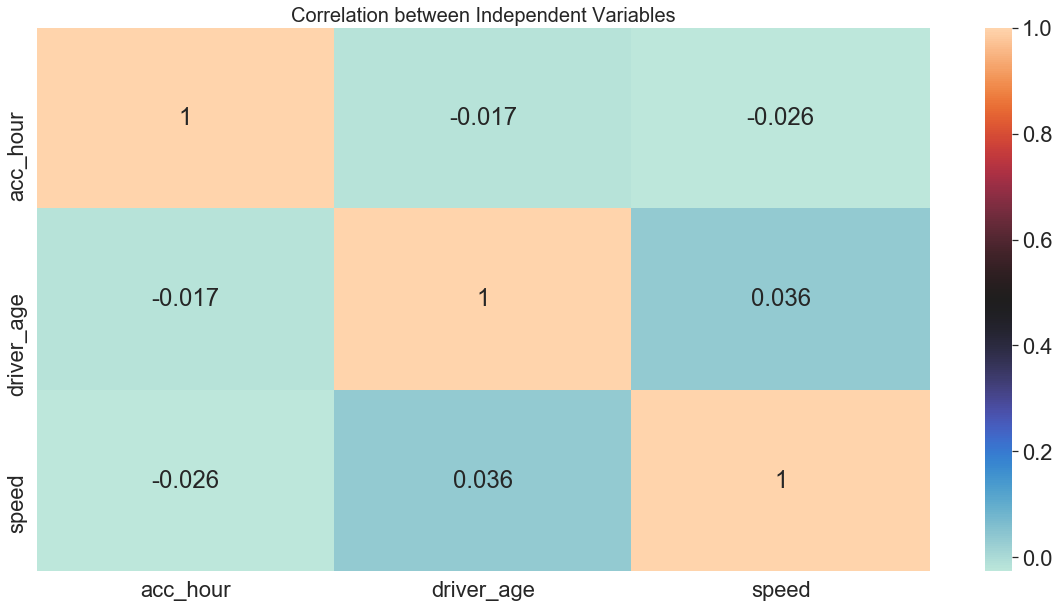

In [10]:
# plotting correlation between numerical features - no significant correlation between numerical variables
sns.set(font_scale=2)
plt.figure(figsize=(20,10)) 
c= df.drop('Num_Acc', axis=1).corr() 
sns.heatmap(c,cmap='icefire',annot=True)
plt.title('Correlation between Independent Variables', fontsize=20) 
c

The correlation check between pairs of numerical variables (hour of accident, driver’s age, speed limit) has revealed no meaningful relationship, as can be seen on the figure above.

## Association between numerical features and outcome variable

In [39]:
#function for visualising numerical variables vs. target variable
def num_target(var):
    for i in range(len(var)):
        fig, ax = plt.subplots(figsize=(6,4))

        sns.kdeplot(df[df['severity']=='light injury'][var[i]], shade=True, color="orange", label='light injury', ax=ax)
        sns.kdeplot(df[df['severity']=='hospitalised'][var[i]], shade=True, color="green", label='hospitalised', ax=ax)
        sns.kdeplot(df[df['severity']=='no injury'][var[i]], shade=True, color="blue", label='no injury', ax=ax)
        sns.kdeplot(df[df['severity']=='killed'][var[i]], shade=True, color="red", label='killed', ax=ax)

        ax.set_xlabel(var[i])
        ax.set_ylabel("Density")
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        fig.suptitle(var[i] + ' vs. Severity of the Accident', fontsize=24);

In [40]:
df.severity.unique()

array(['light injury', 'hospitalised', 'no injury', 'killed'],
      dtype=object)

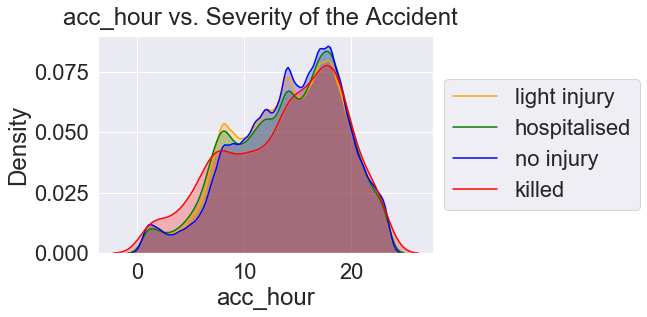

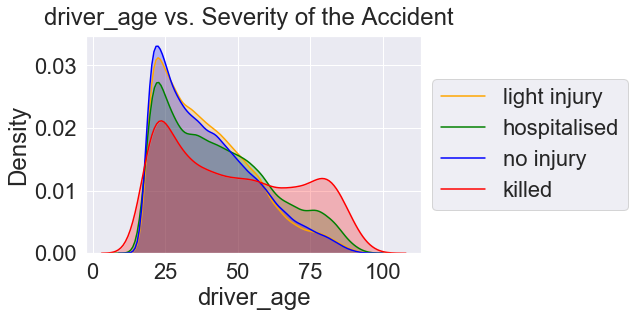

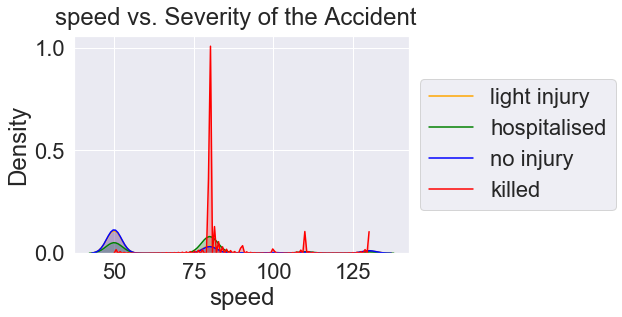

In [41]:
vat=list(df.select_dtypes(include='number').columns)
vat.remove('Num_Acc')
num_target(vat)

## Association between categorical features and target variable

In [57]:
#function to visualise categorical variables vs. target variable

def cat_target(var):
    for i in range(len(var)):
        fig, ax = plt.subplots(figsize=(10,8))

        sns.set_palette("RdBu")

        sns.catplot('severity', hue=var[i], data=df, kind="count", sharey=False, ax=ax)

        plt.close(plt.gcf()) # closing an empty extra plot
        
        ax.legend(title=var[i])
        ax.set_xticklabels(df.severity.unique())
        ax.set_xlabel("Injury Severity", fontsize=20)
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        fig.suptitle(var[i]+ ' vs. Severity of the Accident', fontsize=24)


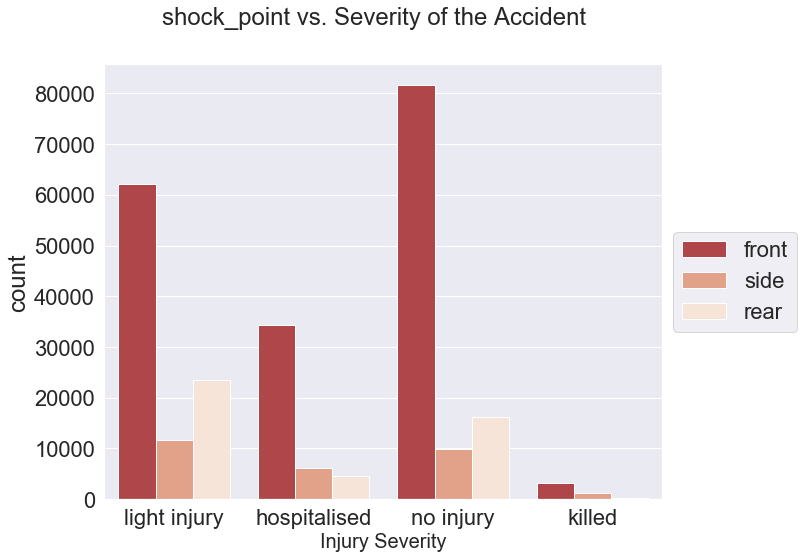

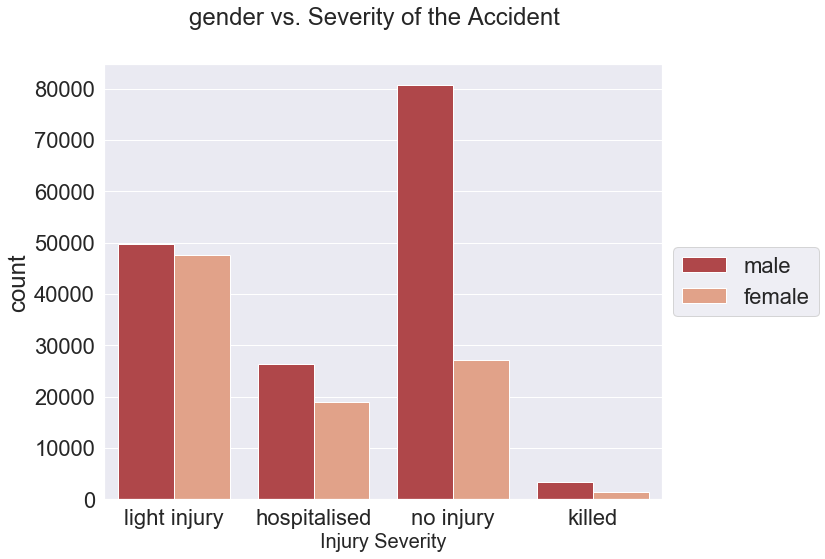

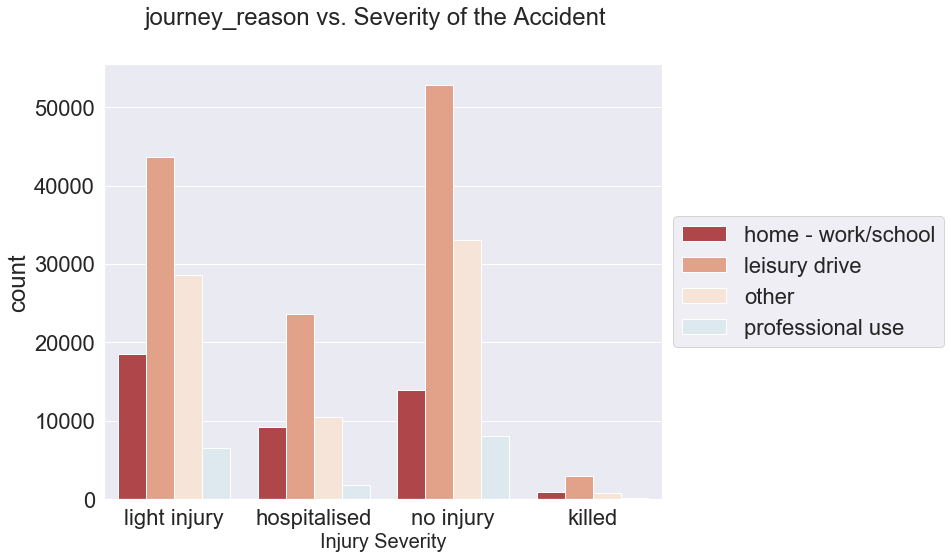

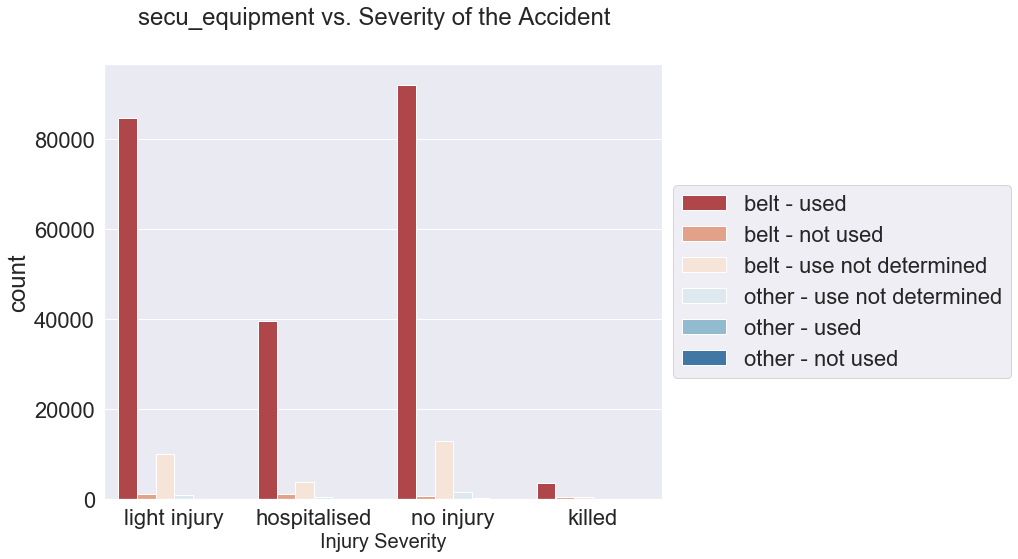

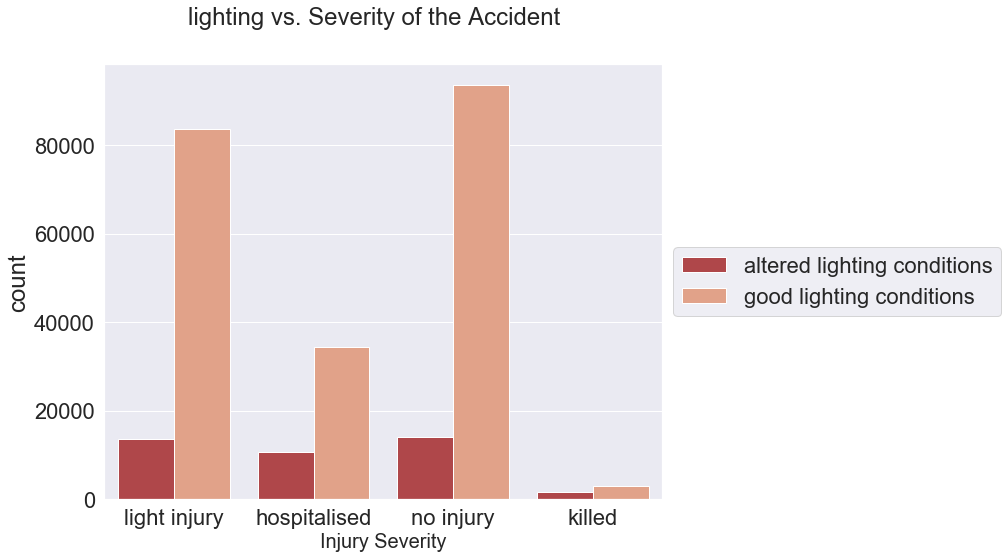

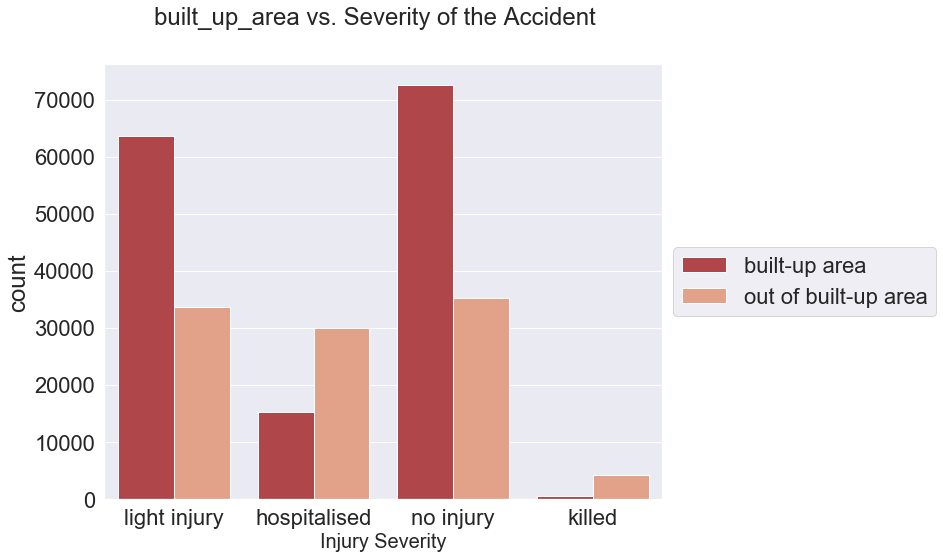

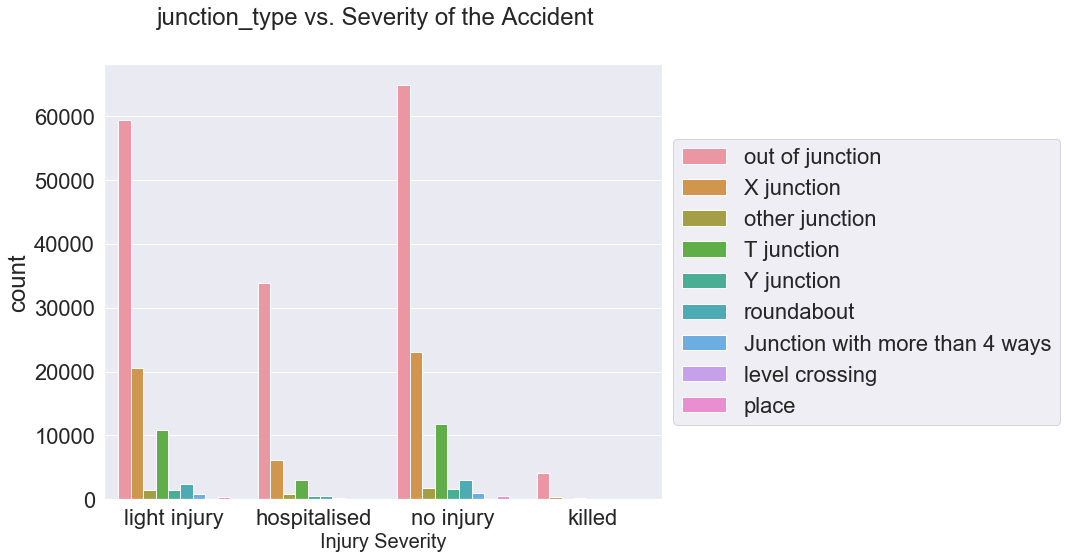

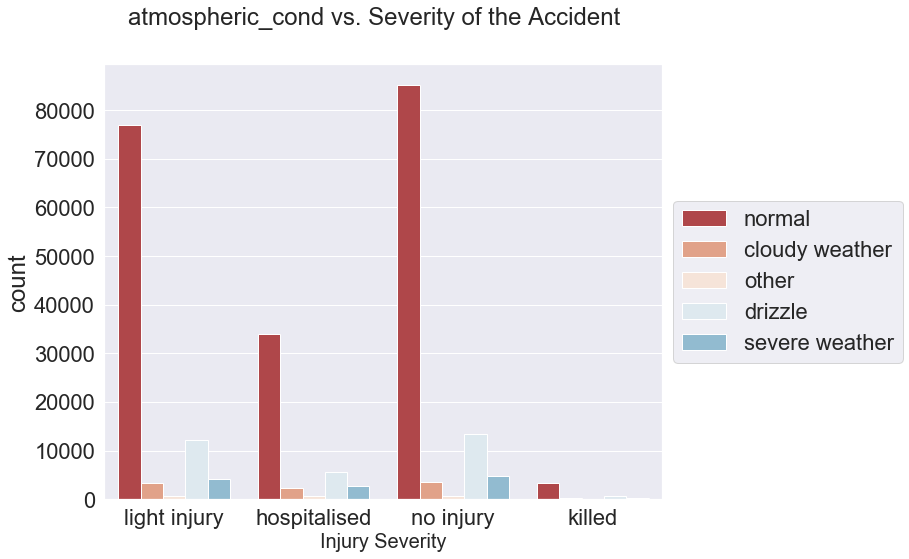

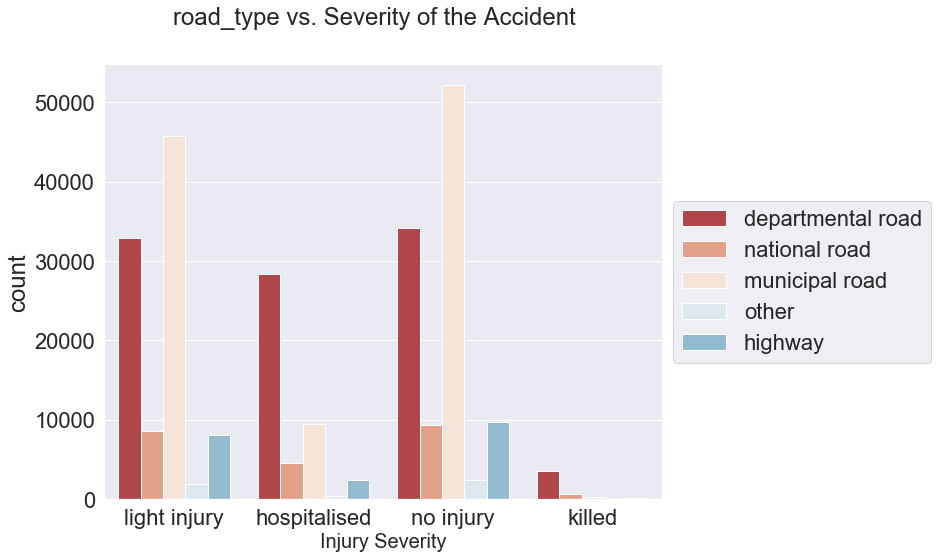

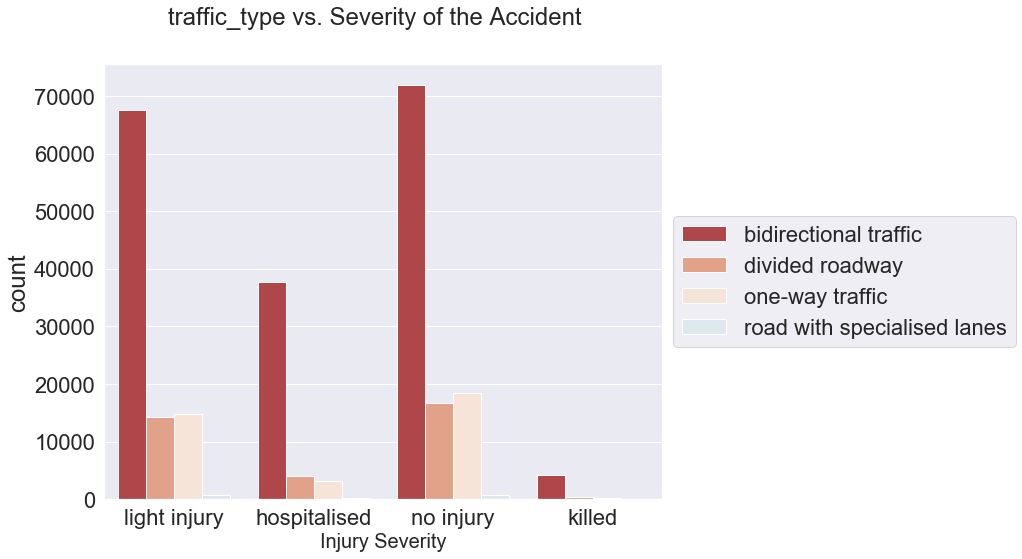

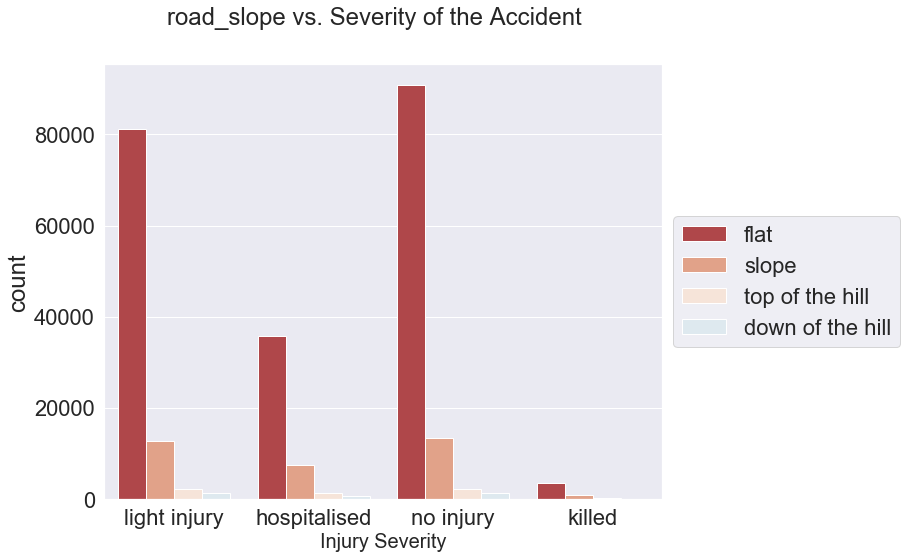

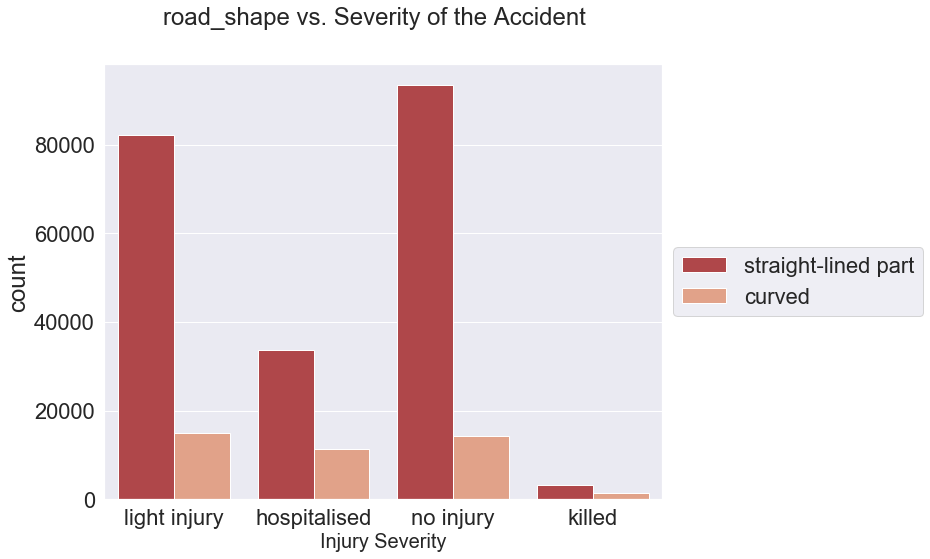

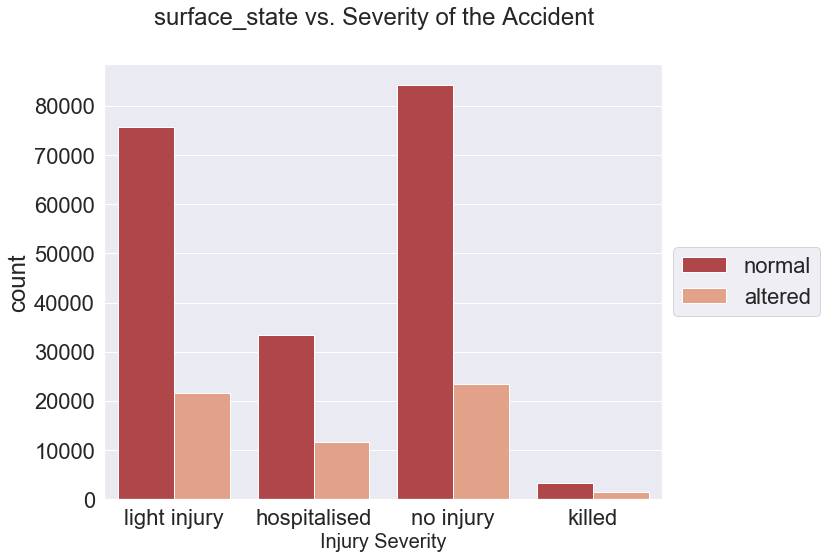

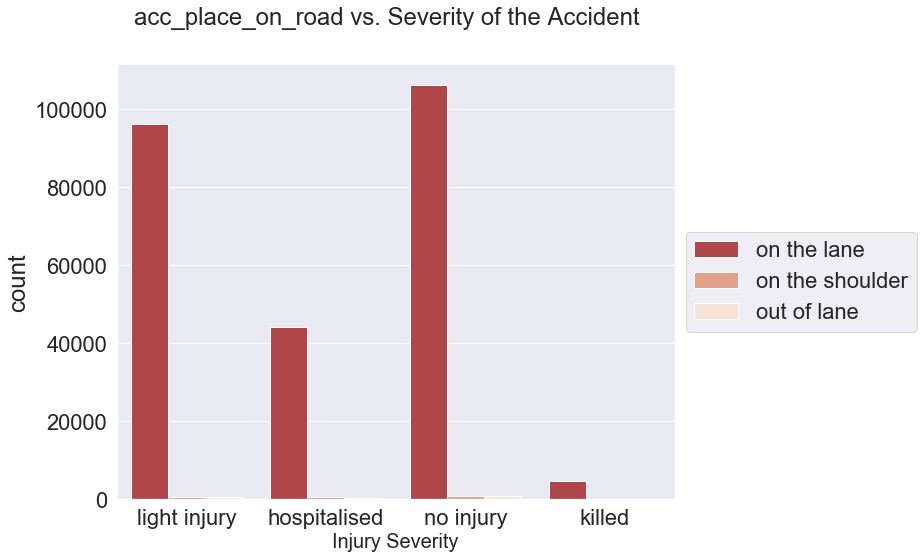

In [58]:
var=list(df.select_dtypes(include='object').columns)
var.remove('severity')
cat_target(var)

In [59]:
#Plotting association between independent categorical features and outcome
#creating function for plots
def counts_plot(var):
    for i in range(len(var)):
        counts_df = df.groupby([var[i], 'severity'])
        counts_df = counts_df['Num_Acc'].count().unstack()
        percents_df = counts_df.T.div(counts_df.T.sum()).T
        
        fig, ax = plt.subplots(figsize=(6,4))
        percents_df.plot(kind="bar", stacked=True, color=['green','red','orange', 'blue'], ax=ax)

        ax.set_xlabel(var[i], fontsize=16)
        ax.set_ylabel("Proportion", fontsize=16)
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        percents_df
        fig.suptitle(var[i]+ ' vs. Severity of the Accident');

The bar charts below illustrate the association between the response variable and the six features mentioned above. Thus, the proportion of more severe injuries is higher in places out of built-up areas vs. built-up ones. Regarding gender, the proportion of no injury accidents for males is considerably higher than for females. Turning now to the road type and shape, the percentage of more severe injuries is higher for departmental and national roads vs. other types, and for curved roads vs.straightlined ones. Given the fact, that the “road type” and “built-up area” variables are moderately associated (0.64 coefficient), we will only include the “built-up area” variable. As for lighting, the
proportion of hospitalised and killed drivers is higher under altered conditions vs. good lighting. Finally, the side and front shock points seem to result in more severe injuries for drivers than the rear shock point.

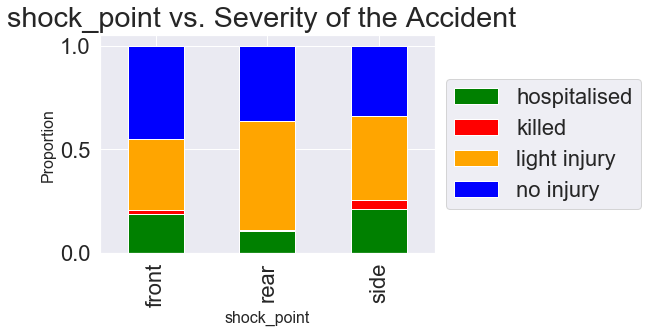

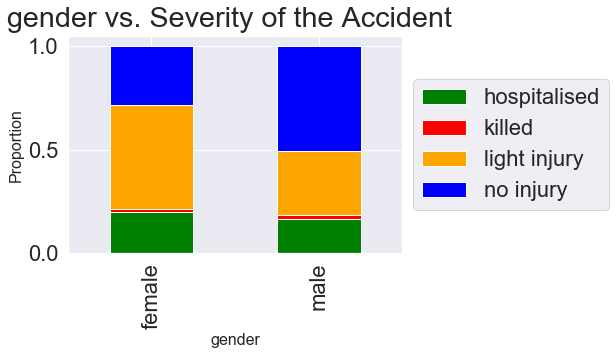

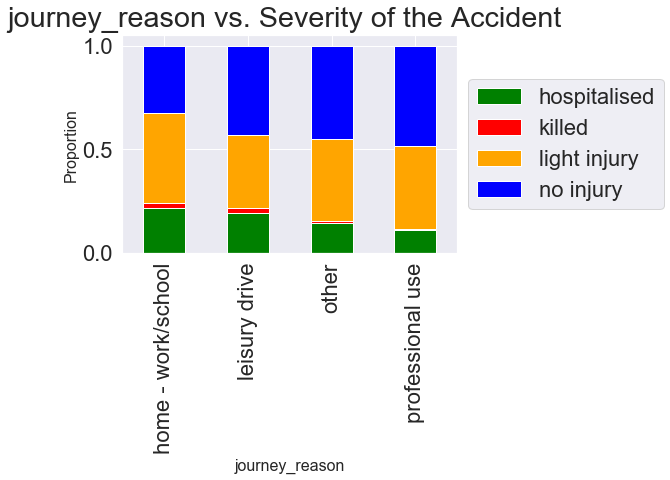

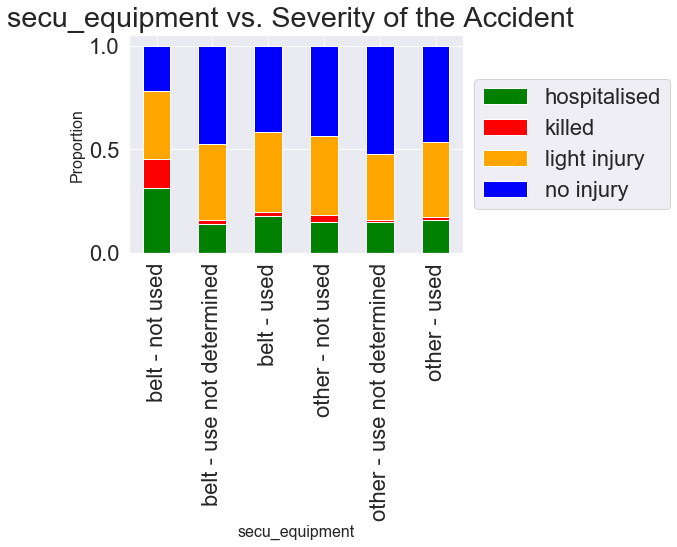

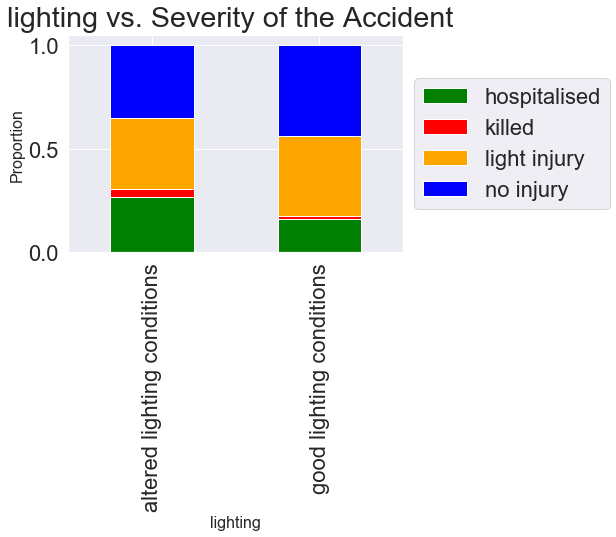

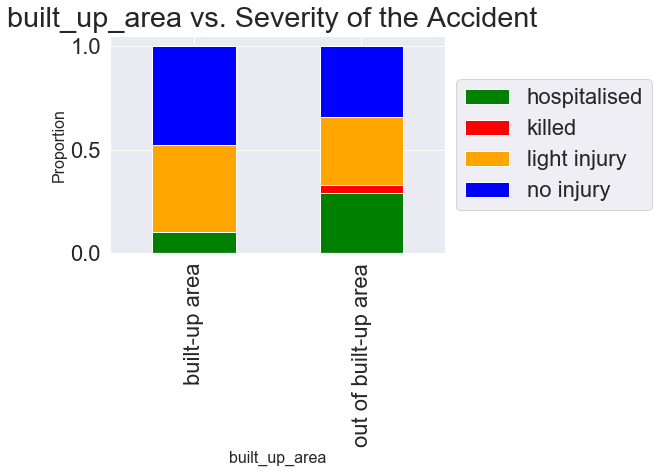

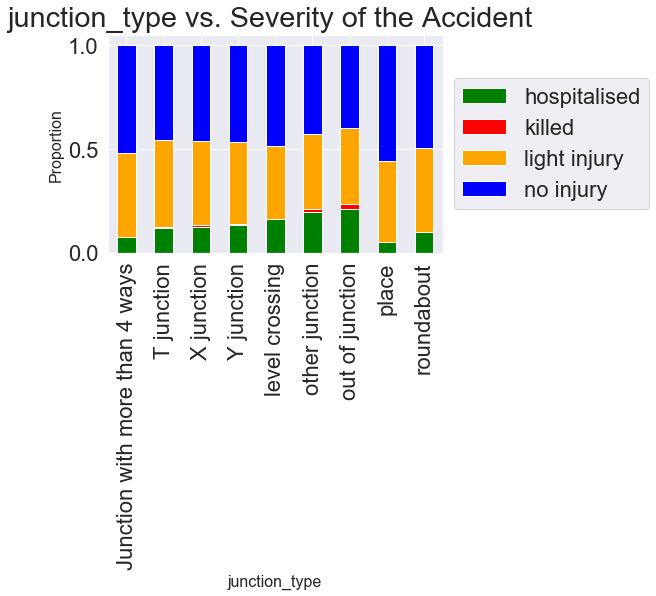

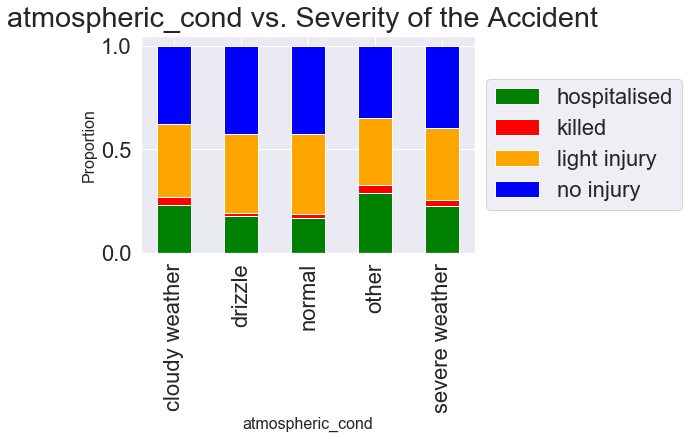

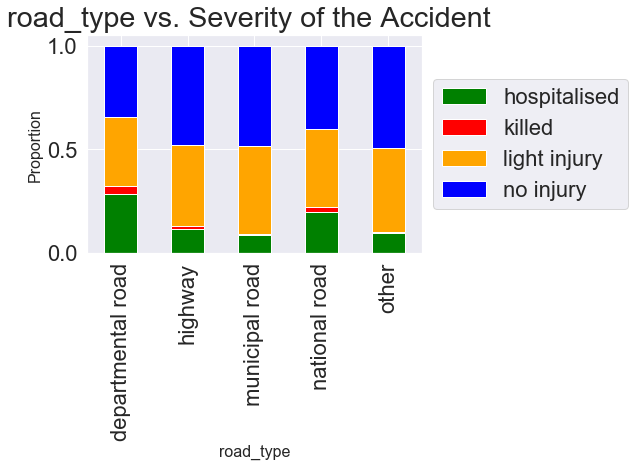

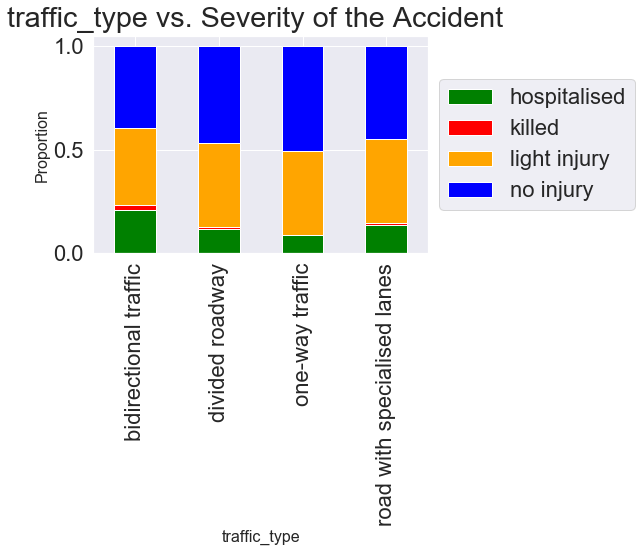

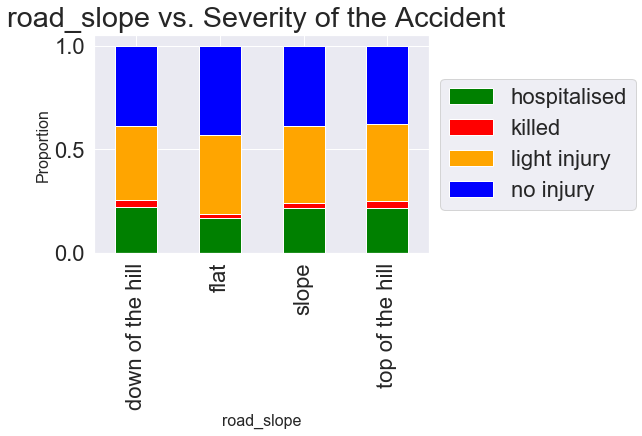

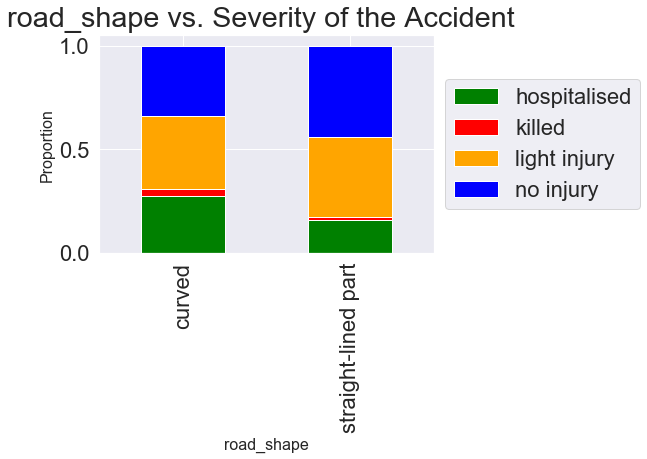

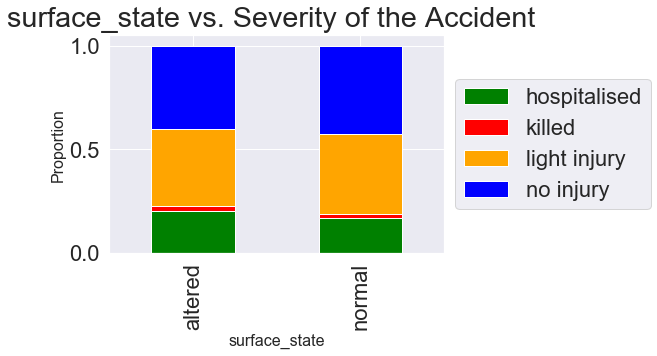

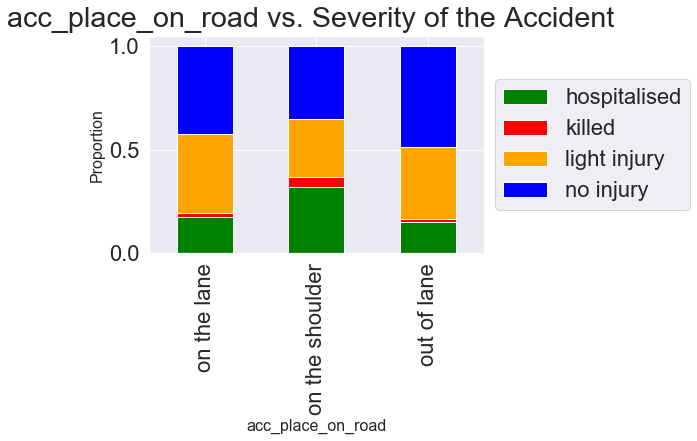

In [60]:
#showing the plots
var=list(df.select_dtypes(include='object').columns)
var.remove('severity')
counts_plot(var)

## Cramer's V test to measure the strength of association between categorical variables

In [61]:
# code from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
#Cramer's V test to measure the strength of association between categorical variables

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [16]:
# building a matrix https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix
var2=list(df.select_dtypes(include='object').columns)
data_encoded=df[var2]
rows= []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded :
        cramers =cramers_v(data_encoded[var1], data_encoded[var2]) # Cramer's V test
        col.append(round(cramers,2)) # rounding value of the Cramer's V  
    rows.append(col)

cramers_results = np.array(rows)
df2 = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)


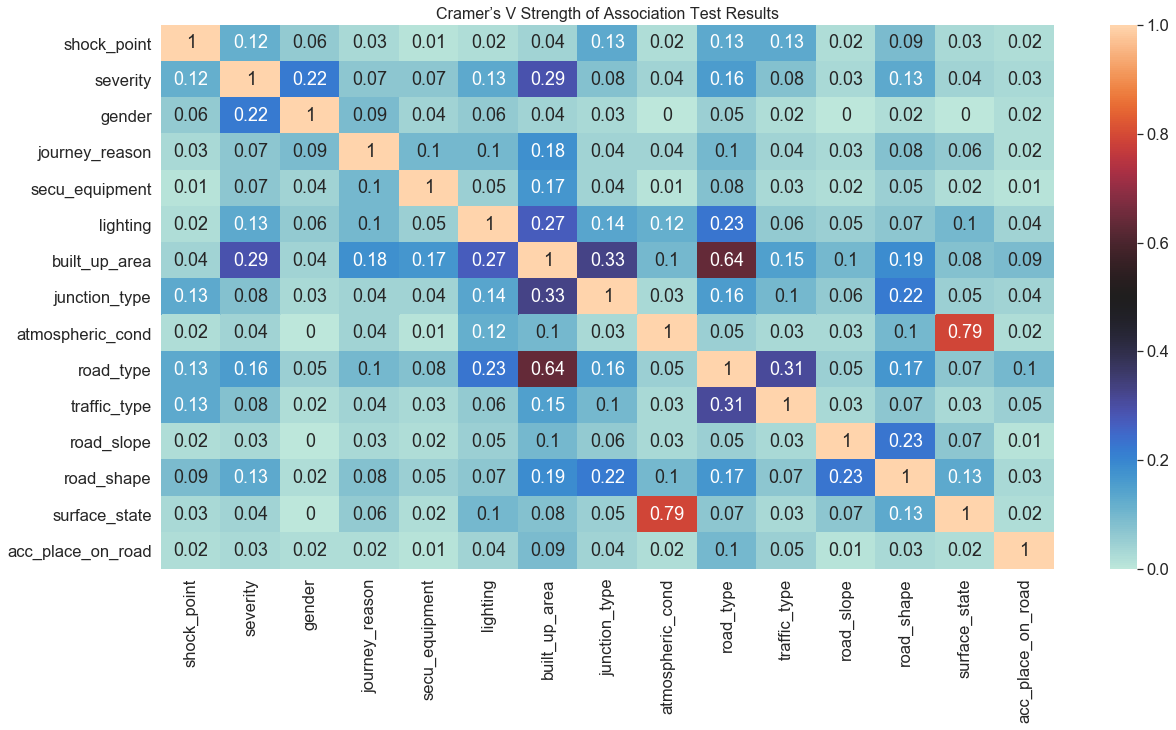

In [18]:
#plotting
plt.figure(figsize=(20,10)) 
sns.set(font_scale=1.5)
sns.heatmap(df2,cmap='icefire',annot=True)
plt.title("Cramer’s V Strength of Association Test Results", fontsize=16)
plt.show()

To check the strength of association between the categorical variables, the Cramer’s V test has been done. First, we have calculated the Chi-square statistic, which is a non-parametric test allowing to analyse the differences between the classes, and then have conducted the Cramer’s V test to analyse the strength of the association. The result of this test is a number in a range from 0 to 1 with lower values meaning lower association. (McHugh, 2013) As shown on the Figure 3 below, “surface_state” and “atmospheric_cond”, as well as “road_type” and “built_up_area” pairs of variables have a high level of association with 0.79 and 0.64 coefficients, respectively. Turning now to the dependent
variable, overall, the association with independent variables is weak, nevertheless, the most significant relationship is revealed to be with the following features (in descending order of importance): “built-up area” – 0.29, “gender” – 0.22, “road_type” – 0.16, “road_shape” – 0.13, “lighting” – 0.13, “shock_point” – 0.12.

### Main Findings:
- dataset is highly imbalanced with two minority classes: “hospitalised” and “killed”, this particularity of the dataset will need to be taken into account when designing the models, also, appropriate evaluation metrics need to be selected to avoid the bias towards majority classes;
- there is no strong correlation between the numerical independent features;
- as per Cramer’s V strength of association test results, “built-up area”, “gender”, “road shape”, “lighting” and “shock point” are the variables showing the strongest association with the outcome variable.
- the features to be included in the models are the following: “speed”, “hour”, “driver’s age”, “builtup area”, “gender”, “road shape”, “lighting” and “shock point”. 